<a href="https://colab.research.google.com/github/18mis7023/18mis7023/blob/main/SPM_Project_Effort_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Software Effort Estimation***

### **`About the data set and attributes`**

> * **TeamExp** :- Team experience measured in years
* **ManagerExp** :- Manager experience measured in years
* **YearEnd** :- Year the project ended
* **Length** :- Duration of the project in months
* **Effort** :- ActualEffort is measured in person-hours
* **Transactions** :- Transactions is a count of basic logical transactions in the system **(t)**
* **Entities** :- Entities is the number of entities in the systems data model **(E)**
* **PointNonAdjust** :- Size of the project measured in adjusted function points  **(FP)** (also we can say it as system size)
* **Adjustment** :- Adjustment points
* **PointAjust** :- Size of the project measured in unadjusted PointsAdj
* **Language** :- Type of language used in the project expressed as 1, 2 or 3. 



In [1]:
import sys
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV



In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [2]:
!wget https://github.com/krishnapriya-atla/dataset/raw/main/desharnais.csv

--2021-12-24 13:31:37--  https://github.com/krishnapriya-atla/dataset/raw/main/desharnais.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krishnapriya-atla/dataset/main/desharnais.csv [following]
--2021-12-24 13:31:37--  https://raw.githubusercontent.com/krishnapriya-atla/dataset/main/desharnais.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3393 (3.3K) [text/plain]
Saving to: ‘desharnais.csv’

desharnais.csv      100%[===================>]   3.31K  --.-KB/s    in 0s      

2021-12-24 13:31:37 (57.3 MB/s) - ‘desharnais.csv’ saved [3393/3393]



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## ***`Loading Data and analysing the data`***

In [90]:
#sftData=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/desharnais.csv")
sftData=pd.read_csv("desharnais.csv")

In [ ]:
sftData.head()

id  Project  TeamExp  ...  Adjustment  PointsAjust  Language
0   1        1        1  ...          34          302         1
1   2        2        0  ...          33          315         1
2   3        3        4  ...          18           83         1
3   4        4        0  ...          30          303         1
4   5        5        0  ...          24          208         1

[5 rows x 13 columns]

In [ ]:
sftData.size

1053

In [ ]:
print(sftData.shape)

(81, 13)


In [ ]:
sftData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAjust      81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


In [ ]:
sftData.describe()

id    Project    TeamExp  ...  Adjustment  PointsAjust   Language
count  81.000000  81.000000  81.000000  ...   81.000000    81.000000  81.000000
mean   41.000000  41.000000   2.185185  ...   27.629630   289.234568   1.555556
std    23.526581  23.526581   1.415195  ...   10.591795   185.761088   0.707107
min     1.000000   1.000000  -1.000000  ...    5.000000    62.000000   1.000000
25%    21.000000  21.000000   1.000000  ...   20.000000   152.000000   1.000000
50%    41.000000  41.000000   2.000000  ...   28.000000   255.000000   1.000000
75%    61.000000  61.000000   4.000000  ...   35.000000   351.000000   2.000000
max    81.000000  81.000000   4.000000  ...   52.000000  1116.000000   3.000000

[8 rows x 13 columns]

In [ ]:
sftData.dtypes

id                 int64
Project            int64
TeamExp            int64
ManagerExp         int64
YearEnd            int64
Length             int64
Effort             int64
Transactions       int64
Entities           int64
PointsNonAdjust    int64
Adjustment         int64
PointsAjust        int64
Language           int64
dtype: object

## Applying machine learning algorithim before preprocessing

###Splitting data 
#####Note: Splitting before feature scaling, data imputation and outlier removal to avoid data leakage and generalise model on unknown data


In [ ]:
max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X=sftData[max_corr_features]
y=sftData['Effort']

In [9]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)
X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=["Effort"]),sftData["Effort"],train_size=0.9,random_state=40)

In [5]:
print(f"Size of the x_train data: {X_train.shape}")
print(f"Size of the x_test data: {X_test.shape}")
print(f"Size of the y_train data: {y_train.shape}")
print(f"Size of the y_test data: {y_test.shape}")

Size of the x_train data: (72, 12)
Size of the x_test data: (9, 12)
Size of the y_train data: (72,)
Size of the y_test data: (9,)


### Linear Regression before preprocesing

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [10]:
import sklearn.metrics as metrics
def regression_results(y_actual, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_actual, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_actual, y_pred) 
    mse=metrics.mean_squared_error(y_actual, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_actual, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_actual, y_pred)
    r2=metrics.r2_score(y_actual, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [11]:
# X_before_train,X_before_test,y_before_train,y_before_test=train_test_split(X,y,test_size=0.1,random_state=99)
l_model=LinearRegression()
l_model.fit(X_train,y_train)
# print(l_model.score(X_train,y_train))
print('accuracy of the model is : ',l_model.score(X_test,y_test))
y_pred=l_model.predict(X_test)
# matrix = confusion_matrix(y_test.to_numpy(),y_pred.astype(int))
# print('confusion matrix',matrix)
# matrix = classification_report(y_test.to_numpy(),y_pred.astype(int))
# print('Classification report : \n',matrix)
regression_results(y_test.to_numpy(),y_pred.astype(int))
# 3(54),5,7(64),8(60),9(53),12(67),14(57),15(71),16(68),18(70.11),21(60.93),24(64.45),36(67),41(61),43(71.22),44(71.31),46(both 60 and 62),
# 47(both 62)
# for test_size 0.1,99 we got a 89%,15(62.6,71.3),16(61.9,74.7),22(69)
# for test_size 0.3 we got a 75%
# for test_size 0.2 we got a 86%
# for test_size 0.4 we got a 75%
# for test_size 0.5 we got a 69%

accuracy of the model is :  0.9405845123420487
explained_variance:  0.9446
mean_squared_log_error:  0.2634
r2:  0.9406
MAE:  1242.7778
MSE:  1895069.2222
RMSE:  1376.6151


### Knn Regression

In [12]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [13]:
# X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=["Effort","TeamExp","ManagerExp","Length"]),sftData["Effort"],train_size=0.9,random_state=99)
#knr_clf = KNeighborsRegressor(n_neighbors=2, weights='uniform',algorithm="auto",p=2)
knr_clf = KNeighborsRegressor()
knr_clf.fit(X_train, y_train) 
print('Accuracy of the model is ',knr_clf.score(X_test, y_test))


Accuracy of the model is  0.38700834847861043


In [14]:
knr_clf.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### **Multiple Logistic Regression**

In [ ]:
sftData.columns

Index(['id', 'Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort',
       'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment',
       'PointsAjust', 'Language'],
      dtype='object')

In [15]:
feature_cols = ['TeamExp','ManagerExp','YearEnd','Length','Transactions','Entities','PointsNonAdjust','Adjustment','Language']
X = sftData[feature_cols] # Features
y = sftData['Effort'] # Target variable

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Min Max Scalling

In [92]:
datatemp=sftData

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
coln=datatemp.columns

In [95]:
datatemp = scaler.fit_transform(datatemp)
datatemp=pd.DataFrame(datatemp)
datatemp.columns=coln

In [96]:
datatemp

id  Project  TeamExp  ...  Adjustment  PointsAjust  Language
0   0.0000   0.0000      0.4  ...    0.617021     0.227704       0.0
1   0.0125   0.0125      0.2  ...    0.595745     0.240038       0.0
2   0.0250   0.0250      1.0  ...    0.276596     0.019924       0.0
3   0.0375   0.0375      0.2  ...    0.531915     0.228653       0.0
4   0.0500   0.0500      0.2  ...    0.404255     0.138520       0.0
..     ...      ...      ...  ...         ...          ...       ...
76  0.9500   0.9500      1.0  ...    0.723404     0.333966       1.0
77  0.9625   0.9625      1.0  ...    0.617021     0.222960       0.0
78  0.9750   0.9750      1.0  ...    0.744681     0.526565       0.0
79  0.9875   0.9875      1.0  ...    0.808511     0.602467       1.0
80  1.0000   1.0000      1.0  ...    0.617021     1.000000       0.0

[81 rows x 13 columns]

In [98]:
X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=['Effort']),y,train_size=0.75,random_state=19)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_train=logreg.predict(X_train)
y_pred=logreg.predict(X_test)
# print('y: ',round(y_test/1000).astype(int))
# print('y: ',round(pd.DataFrame(y_pred/1000)).astype(int))
# print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy:",metrics.accuracy_score(round(y_test/1000).astype(int), round(pd.DataFrame(y_pred/1000)).astype(int)))

ValueError: ignored

***Model Evaluation***

## Preprocessing

In [43]:
corr = sftData.corr()
corr.style.background_gradient(cmap='coolwarm')

### Profile Report of the dataset

In [ ]:
sftprofile=ProfileReport(sftData,title='Software Project Effort Estimation',html={'style':{'full_width':True}})
sftprofile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


> **By observing the profile report**

---

**For TeamExp** : We are having the -1 also but experience should br >=0 only so it is the noisy data (only 2 rows having -1 so we can keep NA for that one

**For ManagerExp** : We are having the -1 also but experience should br >=0 only so it is the noisy data (only 2 rows having -1 so we can keep NA for that one

**For Language** : it is an categorical column with numbers 1,2,3

from correlation 

1.   Length,Transactions,Entities,PointNonAdjust,Adjsutment,pointAdjust

From the interaction 

1.   we can say for team exp and effort having an outlier at 4
2.   for transaction and effort also having 1 outlier observed in the graph
3.   for pointsnotadjust and effort also having 1 outlier observed in the graph



In [44]:
#@title After observing the above profile report id and Project columns both are having unique and equal data. so for prediction those columns are not useful { form-width: "40%", display-mode: "both" }

sftData=sftData.drop(columns=["id","Project"])
sftData.columns

Index(['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 'Transactions',
       'Entities', 'PointsNonAdjust', 'Adjustment', 'PointsAjust', 'Language'],
      dtype='object')

In [45]:
#@title Here Language is given as int dtype but it is an character dtype(factors)
sftData['Language']=sftData['Language'].astype('object')

In [46]:
sftData.dtypes

TeamExp             int64
ManagerExp          int64
YearEnd             int64
Length              int64
Effort              int64
Transactions        int64
Entities            int64
PointsNonAdjust     int64
Adjustment          int64
PointsAjust         int64
Language           object
dtype: object

In [47]:
#@title Replace the -1 value with 1 of TeamExp and ManagerExp, because in experience there wont be negative so it is noiss data { form-width: "50%" }
sftData['ManagerExp'][sftData['ManagerExp']==-1]=1
sftData['TeamExp'][sftData['TeamExp']==-1]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
sftData.describe()

TeamExp  ManagerExp  ...  Adjustment  PointsAjust
count  81.000000   81.000000  ...   81.000000    81.000000
mean    2.234568    2.604938  ...   27.629630   289.234568
std     1.334837    1.522161  ...   10.591795   185.761088
min     0.000000    0.000000  ...    5.000000    62.000000
25%     1.000000    1.000000  ...   20.000000   152.000000
50%     2.000000    3.000000  ...   28.000000   255.000000
75%     4.000000    4.000000  ...   35.000000   351.000000
max     4.000000    7.000000  ...   52.000000  1116.000000

[8 rows x 10 columns]

In [49]:
#@title Now encoding the labels into number if exist using Label encoding 
from sklearn.preprocessing import LabelEncoder
encoders={}
for col in sftData:
  if sftData[col].dtype==np.object:
    encoders[col]=LabelEncoder()
    sftData[col]=encoders[col].fit_transform(sftData[col])
print(f"Label  encoded columns are:  {list(encoders.keys())}")

Label  encoded columns are:  ['Language']


In [50]:
#@title Creating a column name list with numerical data of dataset and categorical
categorical_columns = set(encoders.keys())
all_columns = set(sftData.columns)
numerical_columns = list(all_columns.difference(categorical_columns))
print(f"Categorical column names are : {categorical_columns}")
print(f"All column names are : {all_columns}")
print(f"Numerical column names are : {numerical_columns}")

Categorical column names are : {'Language'}
All column names are : {'PointsNonAdjust', 'Effort', 'Length', 'Adjustment', 'Entities', 'Transactions', 'PointsAjust', 'YearEnd', 'TeamExp', 'Language', 'ManagerExp'}
Numerical column names are : ['PointsNonAdjust', 'Effort', 'Length', 'Adjustment', 'Entities', 'Transactions', 'PointsAjust', 'YearEnd', 'TeamExp', 'ManagerExp']


###Inspecting duplicates

In [51]:
print(f"Duplicates in the data: {sftData.duplicated().sum()}")

Duplicates in the data: 0


### Detecting outliers for numerical data
>**high oulier** = Q3 + (1.5)\*IQR <br>
>**lower oulier** = Q1 - (1.5)\*IQR <br>
> **IQR** = (Q3-Q1)

In [52]:
high_out = sftData[numerical_columns].quantile(q=0.75) + 1.5 * ( sftData[numerical_columns].quantile(q=0.75) - sftData[numerical_columns].quantile(q=0.25) )
low_out = sftData[numerical_columns].quantile(q=0.25) - 1.5 * ( sftData[numerical_columns].quantile(q=0.75) - sftData[numerical_columns].quantile(q=0.25) )
print("sftData dataset: \n")
print(f"High Outliers\n{high_out}\n")
print(f"Low Outliers\n{low_out}")

sftData dataset: 

High Outliers
PointsNonAdjust      696.0
Effort             11277.0
Length                26.0
Adjustment            57.5
Entities             337.0
Transactions         428.0
PointsAjust          649.5
YearEnd               90.0
TeamExp                8.5
ManagerExp             8.5
dtype: float64

Low Outliers
PointsNonAdjust    -136.0
Effort            -3003.0
Length               -6.0
Adjustment           -2.5
Entities           -111.0
Transactions       -116.0
PointsAjust        -146.5
YearEnd              82.0
TeamExp              -3.5
ManagerExp           -3.5
dtype: float64


###Visualising outliers


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

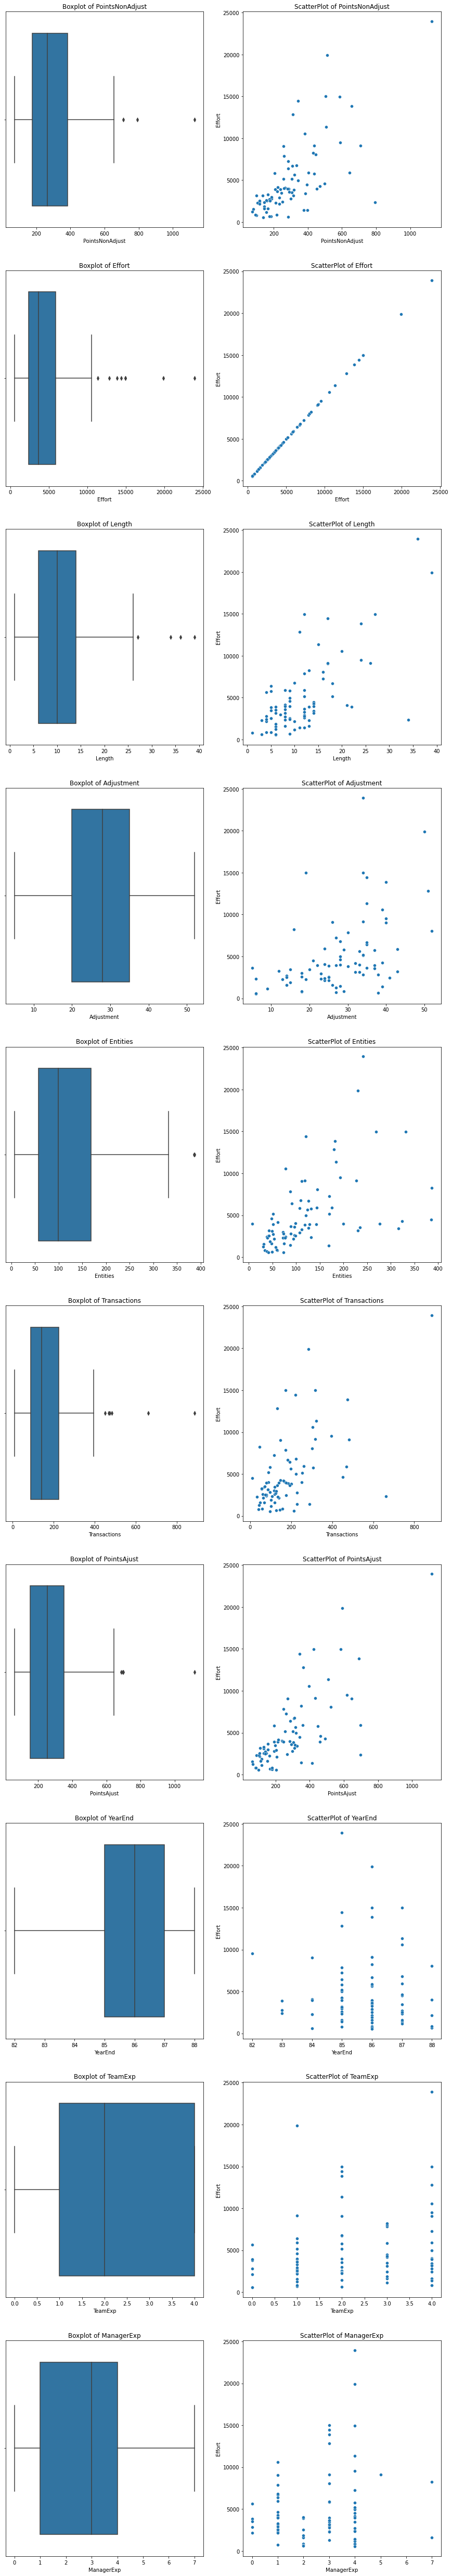

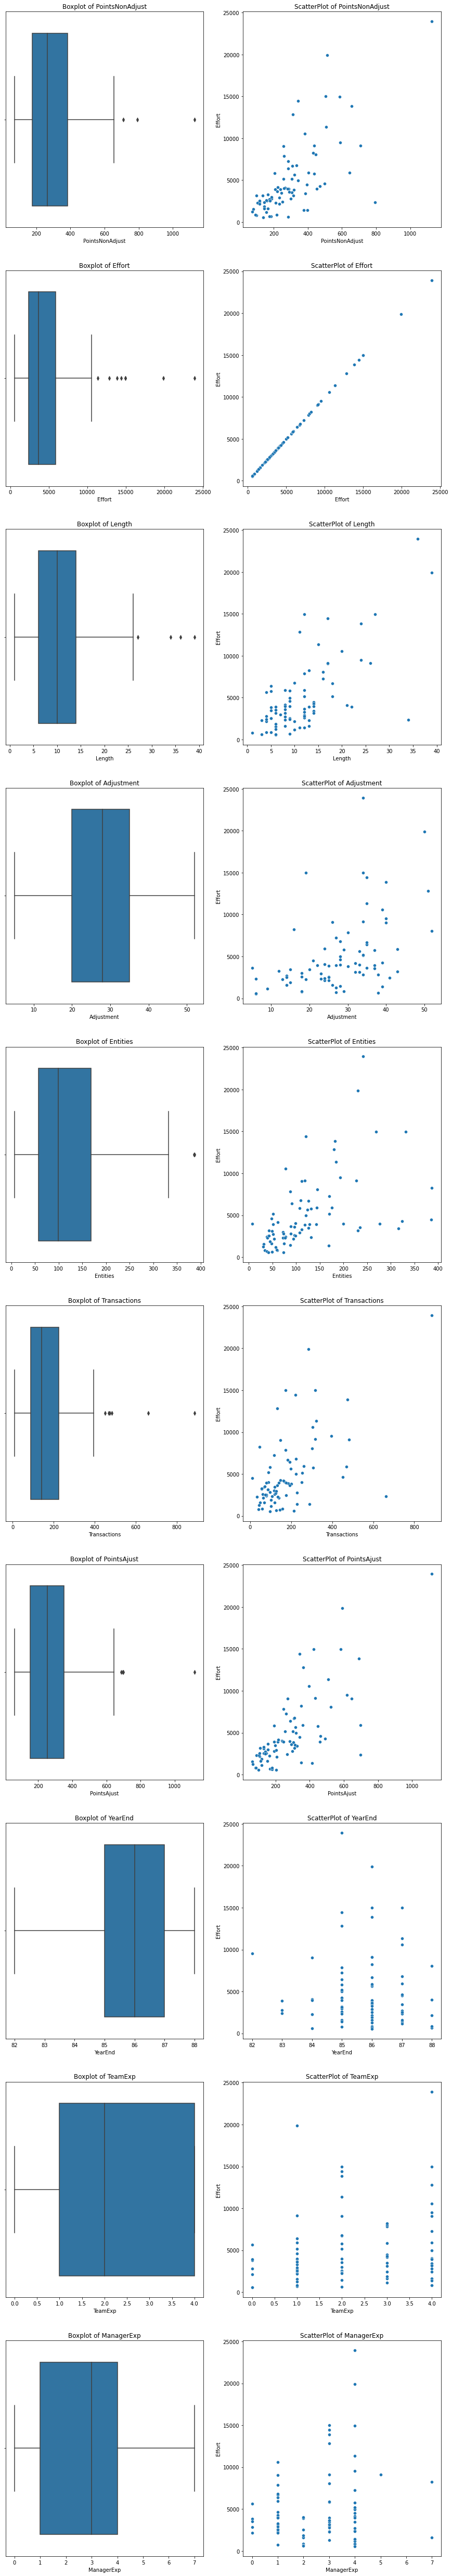

In [54]:
fig, axes=plt.subplots(len(numerical_columns),2,figsize=(15,90))
for i in range(len(numerical_columns)):
    sns.boxplot(data=sftData,x=numerical_columns[i],ax=axes[i,0])
    axes[i,0].set_title("Boxplot of "+numerical_columns[i])
    sns.scatterplot(data=sftData, x=numerical_columns[i], y="Effort",ax=axes[i,1])
    axes[i,1].set_title("ScatterPlot of "+numerical_columns[i])
plt.show()
fig

###Removing Outlier


In [55]:
from numpy.testing._private.utils import integer_repr
from numpy.core.numeric import NaN
# from numpy.core.numeric import NaN
def remove_lows(features,i,high_outlier,low_outlier):
    features[i][features[i]<low_outlier[i]]=int(features[i].median(skipna=True))
    return features[i]
def remove_highs(features,i,high_outlier,low_outlier):
    features[i][features[i]>high_outlier[i]]=int(features[i].median(skipna=True))
    return features[i]
def remove_both(features,i,high_outlier,low_outlier):
    features[i][(features[i]>high_outlier[i])|(features[i]<low_outlier[i])]=int(features[i].median(skipna=True))
    return features[i]
def same(features,i,high_outlier,low_outlier):
    return features[i]
def outlier_remover(features,targets,high_outlier,low_outlier):
    best_process={0:same,1:remove_lows,2:remove_highs,3:remove_both}
    column_names=features.columns
    features_copy=features.copy()
    for i in column_names:
        #Storing the initial correlation and appending the correlation of outlier removal datasets
        correlations=[pd.DataFrame(features[i]).corrwith(targets)[0]]
        #removing lower outliers
        correlations.append(pd.DataFrame(best_process[1](features.copy(),i,high_outlier,low_outlier)).corrwith(targets)[0])
        #removing higher outliers
        correlations.append(pd.DataFrame(best_process[2](features.copy(),i,high_outlier,low_outlier)).corrwith(targets)[0])
        #removing higher and lower outliers
        correlations.append(pd.DataFrame(best_process[3](features.copy(),i,high_outlier,low_outlier)).corrwith(targets)[0])
        #selecting best approac
        features[i]=best_process[3](features,i,high_outlier,low_outlier)
    return features

In [56]:
from itertools import compress 
#finding numerical columns where lower outlier is not equal to high outlier
sftData_outlier_col=list(compress(numerical_columns, (high_out!=low_out).to_list()))
#removing outliers in sftData set
sftData=outlier_remover(sftData[sftData_outlier_col],sftData['Effort'],high_out,low_out)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._wh

### After removing the outliers and filled with appropriate value

In [57]:
high_after_out = sftData[numerical_columns].quantile(q=0.75) + 1.5 * ( sftData[numerical_columns].quantile(q=0.75) - sftData[numerical_columns].quantile(q=0.25) )
low_after_out = sftData[numerical_columns].quantile(q=0.25) - 1.5 * ( sftData[numerical_columns].quantile(q=0.75) - sftData[numerical_columns].quantile(q=0.25) )
print("sftData dataset: \n")
print(f"Before\nHigh Outliers\n{high_out}\n")
print(f"Low Outliers\n{low_out}\n")
print(f"After\nHigh Outliers\n{high_after_out}\n")
print(f"Low Outliers\n{low_after_out}\n")

sftData dataset: 

Before
High Outliers
PointsNonAdjust      696.0
Effort             11277.0
Length                26.0
Adjustment            57.5
Entities             337.0
Transactions         428.0
PointsAjust          649.5
YearEnd               90.0
TeamExp                8.5
ManagerExp             8.5
dtype: float64

Low Outliers
PointsNonAdjust    -136.0
Effort            -3003.0
Length               -6.0
Adjustment           -2.5
Entities           -111.0
Transactions       -116.0
PointsAjust        -146.5
YearEnd              82.0
TeamExp              -3.5
ManagerExp           -3.5
dtype: float64

After
High Outliers
PointsNonAdjust     596.0
Effort             8022.0
Length               23.5
Adjustment           57.5
Entities            274.5
Transactions        353.0
PointsAjust         587.0
YearEnd              90.0
TeamExp               8.5
ManagerExp            8.5
dtype: float64

Low Outliers
PointsNonAdjust     -76.0
Effort            -1050.0
Length               -4.

In [58]:
from itertools import compress 
#finding numerical columns where lower outlier is not equal to high outlier
sftData_outlier_col=list(compress(numerical_columns, (high_out!=low_out).to_list()))
#removing outliers in sftData set
sftData=outlier_remover(sftData[sftData_outlier_col],sftData['Effort'],high_after_out,low_after_out)

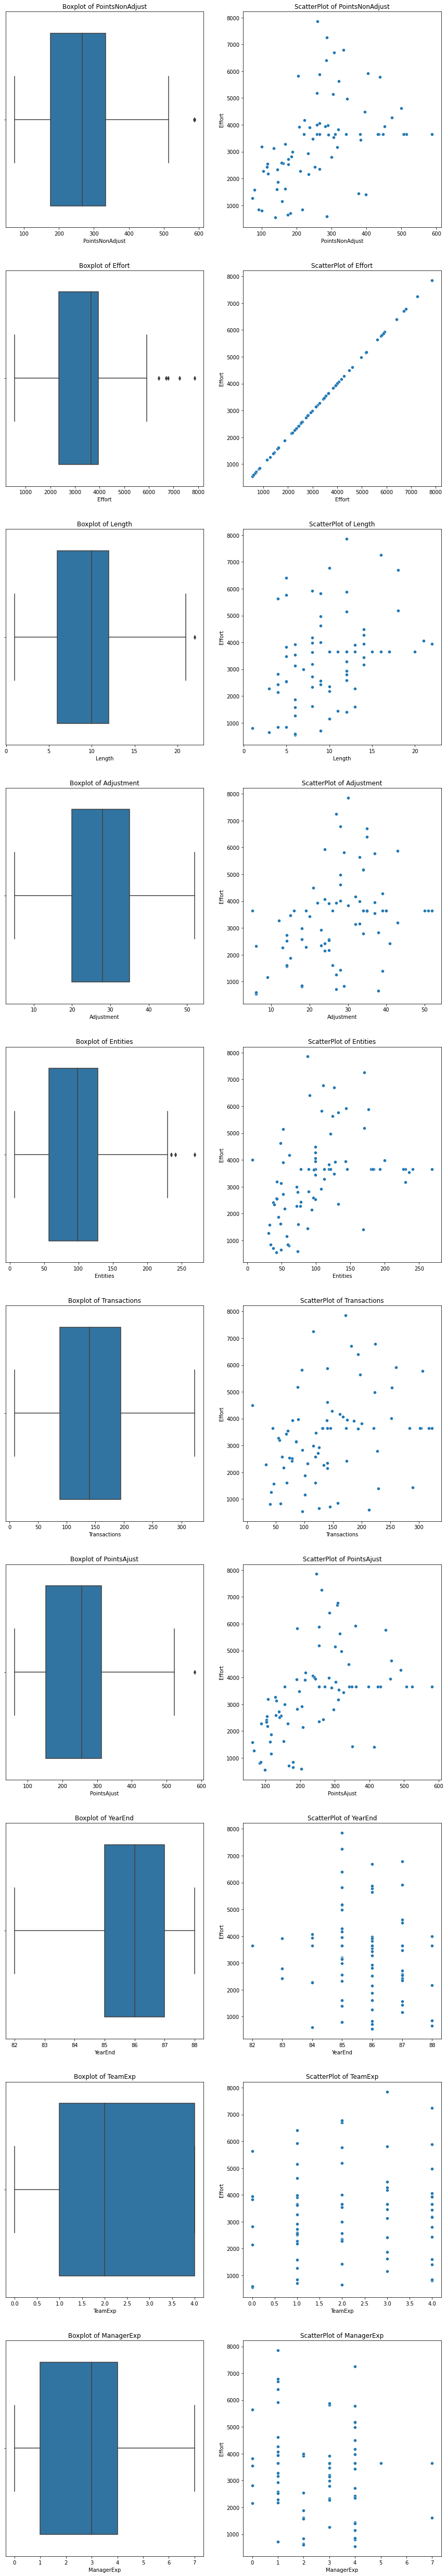

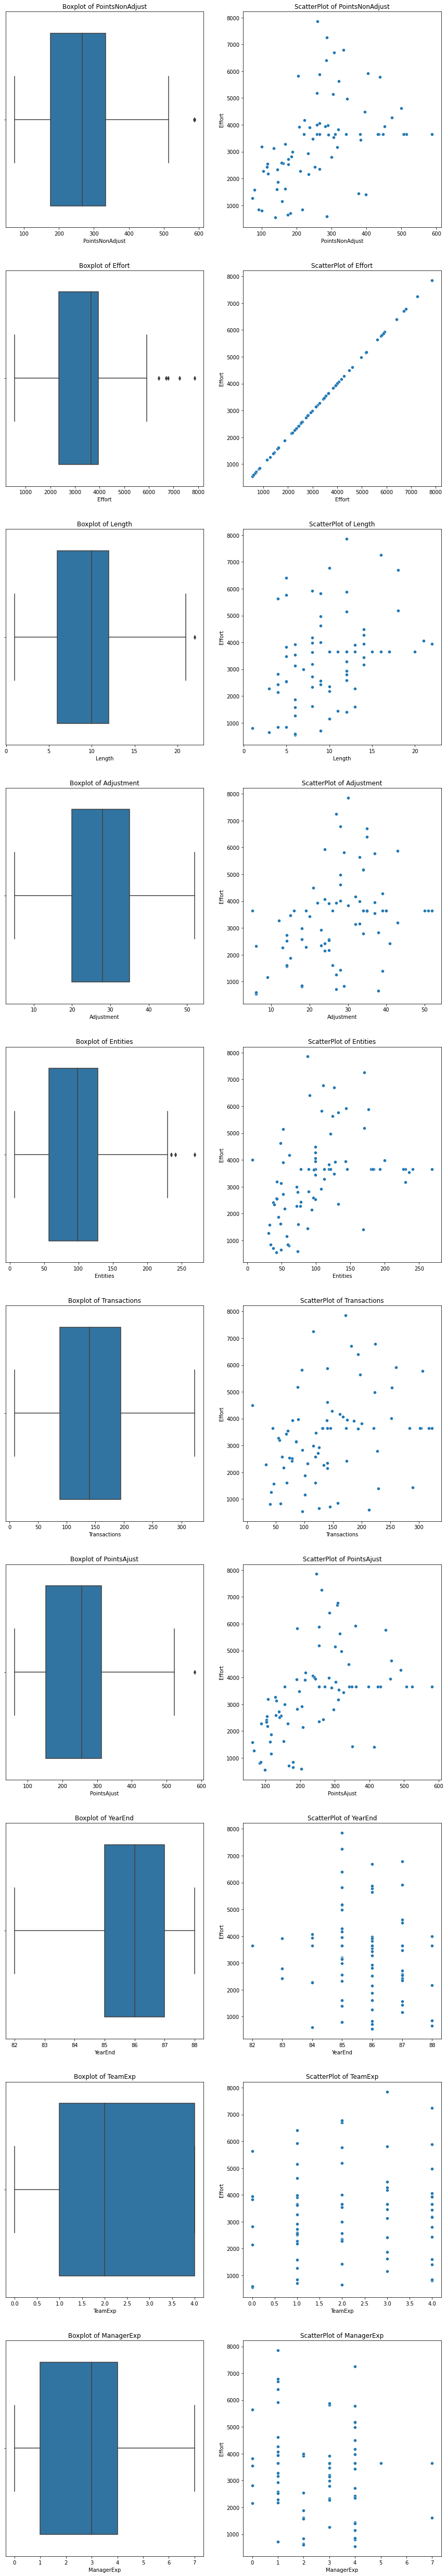

In [59]:
fig, axes=plt.subplots(len(numerical_columns),2,figsize=(15,90))
for i in range(len(numerical_columns)):
    sns.boxplot(data=sftData,x=numerical_columns[i],ax=axes[i,0])
    axes[i,0].set_title("Boxplot of "+numerical_columns[i])
    sns.scatterplot(data=sftData, x=numerical_columns[i], y="Effort",ax=axes[i,1])
    axes[i,1].set_title("ScatterPlot of "+numerical_columns[i])
plt.show()
fig

In [ ]:
sftData.dtypes

Entities           int64
TeamExp            int64
PointsNonAdjust    int64
ManagerExp         int64
Adjustment         int64
YearEnd            int64
PointsAjust        int64
Length             int64
Effort             int64
Transactions       int64
dtype: object

In [60]:
tempdata=sftData

In [ ]:
sftData=tempdata

### Min Max Scalling

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
coln=sftData.columns

In [73]:
sftData = scaler.fit_transform(sftData)
sftData=pd.DataFrame(sftData)
sftData.columns=coln

In [63]:
sftData

PointsNonAdjust    Effort    Length  ...   YearEnd  TeamExp  ManagerExp
0          0.450485  0.630268  0.523810  ...  0.500000     0.25    0.571429
1          0.481553  0.696360  0.142857  ...  0.666667     0.00    0.000000
2          0.052427  0.035441  0.000000  ...  0.500000     1.00    0.571429
3          0.477670  0.449234  0.190476  ...  0.666667     0.00    0.000000
4          0.312621  0.219349  0.142857  ...  0.666667     0.00    0.000000
..              ...       ...       ...  ...       ...      ...         ...
76         0.631068  0.116858  0.523810  ...  0.500000     1.00    0.571429
77         0.440777  0.308429  0.523810  ...  0.166667     1.00    0.428571
78         1.000000  0.424330  0.428571  ...  0.000000     1.00    0.571429
79         0.374757  0.729885  0.523810  ...  0.666667     1.00    0.428571
80         0.374757  0.424330  0.428571  ...  0.500000     1.00    0.571429

[81 rows x 10 columns]

### Splitting the data to visualize the data

In [64]:
X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=["Effort"]),sftData["Effort"],train_size=0.9,random_state=96)

In [65]:
all_columns = set(X_train.columns)
numerical_columns = list(all_columns.difference(categorical_columns))

In [ ]:
sftData


###Visualising the data distribution of numerical columns on train and test set

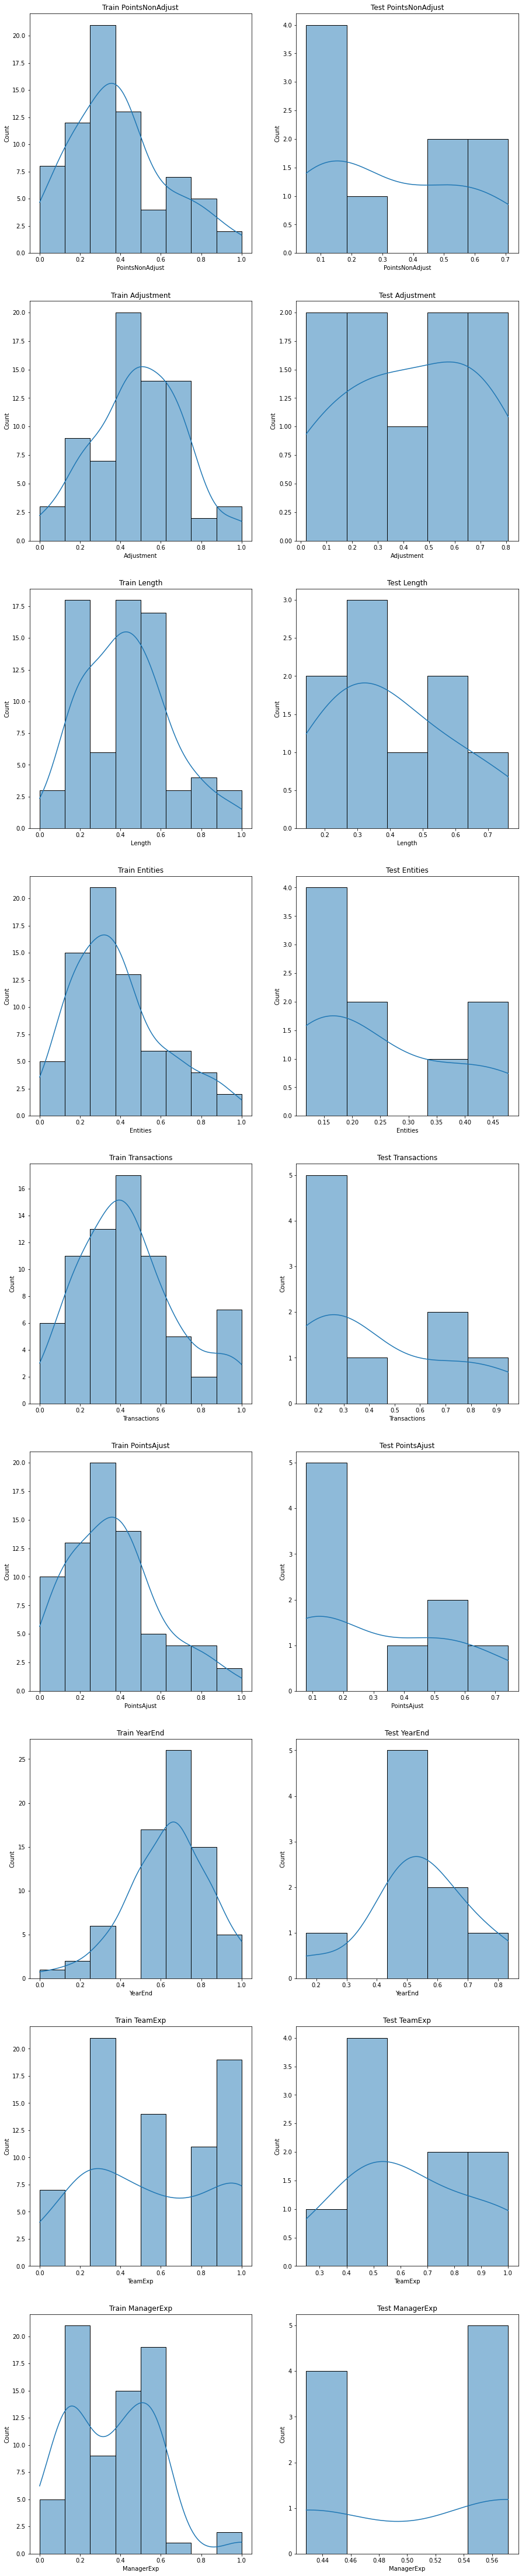

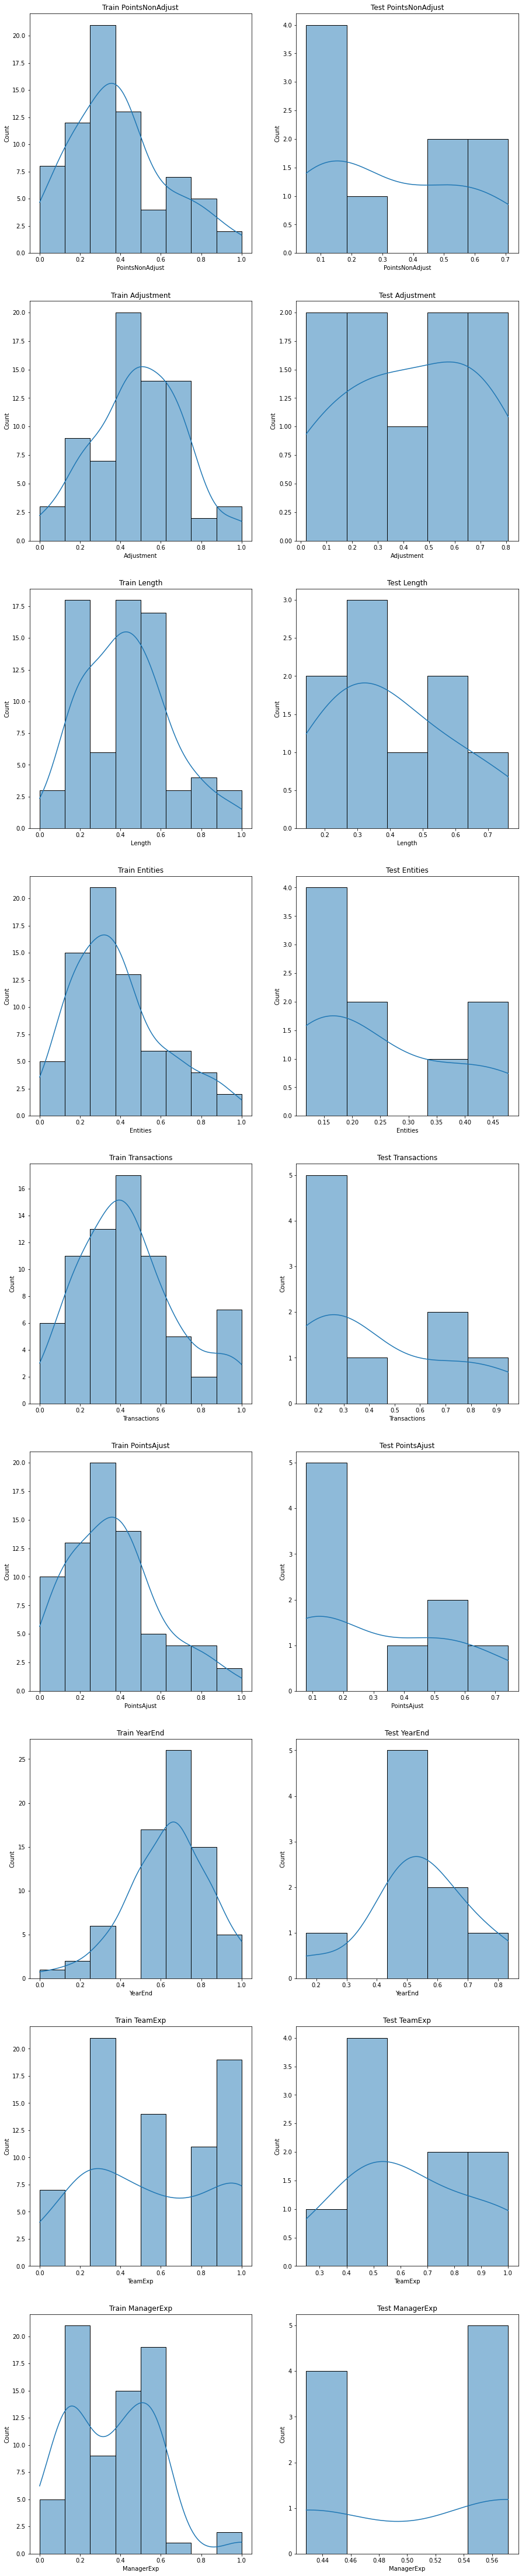

In [66]:
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
fig, axes=plt.subplots(len(numerical_columns),2,figsize=(15,80))
for i in range(len(numerical_columns)):
    sns.histplot(data=X_train,x=numerical_columns[i],ax=axes[i,0],kde=True)
    axes[i,0].set_title("Train "+numerical_columns[i])
    sns.histplot(data=X_test,x=numerical_columns[i],ax=axes[i,1],kde=True)
    axes[i,1].set_title("Test "+numerical_columns[i])
plt.show()
fig

From above visualization the distrubution of data is same there
pointsNonAdjust,Yearend,pointsadjust,adjustement,Transactions,Entities

###Measuring skewness

In [67]:
#@title Here if we see the skewness output for every column. Every thing is having less Skewness
for i in numerical_columns:
    print(f"{i} column in train set skewness: {scipy.stats.skew(X_train[[i]])[0]}")
    print(f"{i} column in test set skewness: {scipy.stats.skew(X_test[[i]])[0]}")
    print("\n******************************************************************")

PointsNonAdjust column in train set skewness: 0.6207563265683747
PointsNonAdjust column in test set skewness: 0.340882590538634

******************************************************************
Adjustment column in train set skewness: -0.05847097106697546
Adjustment column in test set skewness: -0.15775536994792821

******************************************************************
Length column in train set skewness: 0.48285322359396404
Length column in test set skewness: 0.47271363246646303

******************************************************************
Entities column in train set skewness: 0.7838868723911527
Entities column in test set skewness: 0.6327407124385707

******************************************************************
Transactions column in train set skewness: 0.6136637802528015
Transactions column in test set skewness: 0.7536748952482889

******************************************************************
PointsAjust column in train set skewness: 0.62210846433237

In [ ]:
sftData

Entities  TeamExp  PointsNonAdjust  ...    Length    Effort  Transactions
0   0.171756     0.25         0.450485  ...  0.523810  0.630268      0.777070
1   0.446565     0.00         0.481553  ...  0.142857  0.696360      0.598726
2   0.202290     1.00         0.052427  ...  0.000000  0.035441      0.098726
3   0.427481     0.00         0.477670  ...  0.190476  0.449234      0.608280
4   0.332061     0.00         0.312621  ...  0.142857  0.219349      0.417197
..       ...      ...              ...  ...       ...       ...           ...
76  0.618321     1.00         0.631068  ...  0.523810  0.116858      0.700637
77  0.251908     1.00         0.440777  ...  0.523810  0.308429      0.694268
78  0.709924     1.00         1.000000  ...  0.428571  0.424330      0.417197
79  0.645038     1.00         0.374757  ...  0.523810  0.729885      0.417197
80  0.893130     1.00         0.374757  ...  0.428571  0.424330      0.417197

[81 rows x 10 columns]

## Inspecting improvements in model

In [74]:
tempdata2=sftData

In [76]:
sftData=tempdata

### Linear Regression

In [71]:
X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=["Effort","TeamExp","ManagerExp","Length"]),sftData["Effort"],train_size=0.9,random_state=96)
l_model=LinearRegression()
l_model.fit(X_train,y_train)
print(f"Accuracy of data set is : {np.round(l_model.score(X_test,y_test)*100,decimals=2)}%")


# print(f"Accuracy of data set is : {np.round(l_model.score(X_test,y_test)*100,decimals=2)}%")
# print(f"Accuracy of data set is : {np.round(l_model.score(X_test,y_test)*100,decimals=2)}%")
y_pred=l_model.predict(X_test)
regression_results(y_test.to_numpy(),y_pred.astype(int))

Accuracy of data set is : 59.47%
explained_variance:  0.6215
mean_squared_log_error:  0.0754
r2:  0.5946
MAE:  638.5556
MSE:  724976.3333
RMSE:  851.4554


### KNN Regression

In [77]:
X_train,X_test,y_train,y_test=train_test_split(sftData.drop(columns=["Effort","TeamExp","ManagerExp","Length"]),sftData["Effort"],train_size=0.9,random_state=23)
knr_clf = KNeighborsRegressor(n_neighbors=2, weights='uniform',algorithm="auto",p=2)
knr_clf.fit(X_train, y_train) 
print(knr_clf.score(X_test, y_test))

0.6348409167748819


### **Multiple Logistic Regression**

In [100]:
sftData=tempdata2

In [ ]:
sftData.columns

Index(['Entities', 'TeamExp', 'PointsNonAdjust', 'ManagerExp', 'Adjustment',
       'YearEnd', 'PointsAjust', 'Length', 'Effort', 'Transactions'],
      dtype='object')

In [79]:
feature_cols = ['TeamExp','ManagerExp','YearEnd','Length','Transactions','Entities','PointsNonAdjust','Adjustment']
X = sftData[feature_cols] # Features
y = sftData['Effort'] # Target variable

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [83]:
# X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=96)
logref=LogisticRegression()
logref.fit(X_train, np.round(y_train))
logref.score(X_test, np.round(y_test))


0.8571428571428571

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=2)
logreg = LogisticRegression()
logreg.fit(X_train,np.round(y_train))
y_pred_train=logreg.predict(X_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(y_pred)))

Accuracy: 0.7619047619047619


## ***Applying Nueral Networks***

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [116]:
X_train, X_test, y_train, y_test = train_test_split(sftData.drop(columns=["Effort","TeamExp","ManagerExp","Length"]),sftData["Effort"], train_size = 0.75, random_state = 0)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

### **Appling MLPClassifier(MULTI-LAYER PERCEPTRON)**

In [117]:
mlp = MLPClassifier(max_iter=1000, activation='relu')
mlp.fit(X_train,np.round(y_train))
pred = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [118]:
cm = confusion_matrix(np.round(y_test), pred)
print('Confusion Matrix\n',cm)
accuracy_score(np.round(y_test), pred)

[[16  2]
 [ 2  1]]


0.8095238095238095

## ***Model Evaluation***

### Defining Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
models_name={
    "svm_clf":"SVC",
    "knn_clf":"KNeighborsClassifier",
    "rf_clf":"RandomForestClassifier",
    "ab_clf":"AdaBoostClassifier",
    "gb_clf":"GradientBoostingClassifier",
    "dt_clf":"DecisionTreeClassifier",
    "lr_clf":"LogisticRegression",
    
}

models={
    
    "knn_clf":KNeighborsClassifier(n_jobs=-1),
    "rf_clf":RandomForestClassifier(n_jobs=-1,random_state=1),
    "ab_clf":AdaBoostClassifier(random_state=1),
    "gb_clf":GradientBoostingClassifier(random_state=1),
    "dt_clf":DecisionTreeClassifier(random_state=1),
    "lr_clf":LogisticRegression(n_jobs=-1,random_state=1),
    "svm_clf":SVC(random_state=1)
    
}
model_params={
    "knn_clf":[{
        "n_neighbors":list(np.arange(3,16,2)),
        "p":[1,2],
    }],
    "rf_clf":[{
        "n_estimators":list(np.arange(100,701,100)),
        "max_features":["auto","log2"]
    }],
    "ab_clf":[{
        "base_estimator":[RandomForestClassifier(n_jobs=-1,random_state=1),
                          DecisionTreeClassifier(random_state=1)],
        "n_estimators":list(np.arange(100,701,100)),
        "learning_rate":[0.1,0.01,0.001],    
    }],
    "gb_clf":[{
        "loss":["deviance", "exponential"],
        "learning_rate":[0.1,0.01,0.001],
        "n_estimators":[600],

    }],
    "dt_clf":[{
        "criterion":['gini', 'entropy'],
    }],
    "lr_clf":[{
        "C":[0.1,1,10],
    }],
    "svm_clf":[{
        "C":[0.1,1,10],
        "kernel":["rbf","linear"]}],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer,confusion_matrix,plot_roc_curve
metric=make_scorer(accuracy_score,greater_is_better=True)

In [ ]:
best_models=[]

###Hyper parameter tuning of each models

In [ ]:
for i in models.keys():
    print(f"****************{models_name[i]}****************")
    grid=GridSearchCV(models[i],model_params[i],scoring=metric,return_train_score=True)
    grid.fit(X_train,y_train)
    print(f"Best parameters of {i} classifier: {grid.best_params_}")
    best_models.append(grid.best_estimator_)
    print(f"Train set accuracy:{np.round(grid.best_score_*100,decimals=2)} %")
    test_pred=grid.predict(X_test)
    print(f"Test set accuracy:{np.round(accuracy_score(y_true=y_test,y_pred=grid.predict(X_test))*100,decimals=2)} ")
    confusion_mat=confusion_matrix(y_true=y_test,y_pred=grid.predict(X_test))
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    sns.heatmap(confusion_mat,annot=True,fmt='.4g',ax=ax[0])
    # plot_roc_curve(grid.best_estimator_,X_test,y_test,ax=ax[1])
    ax[0].set_title('Confusion Matrix')
    ax[1].set_title('ROC AUC curve')
    plt.show()

****************KNeighborsClassifier****************


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Best parameters of knn_clf classifier: {'n_neighbors': 11, 'p': 1}
Train set accuracy:18.1 %
Test set accuracy:22.22 
****************RandomForestClassifier****************


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Best parameters of rf_clf classifier: {'max_features': 'auto', 'n_estimators': 300}
Train set accuracy:12.57 %
Test set accuracy:11.11 
****************AdaBoostClassifier****************


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Best parameters of ab_clf classifier: {'base_estimator': RandomForestClassifier(n_jobs=-1, random_state=1), 'learning_rate': 0.1, 'n_estimators': 100}
Train set accuracy:14.0 %
Test set accuracy:11.11 
****************GradientBoostingClassifier****************


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/loc

Best parameters of gb_clf classifier: {'learning_rate': 0.001, 'loss': 'deviance', 'n_estimators': 600}
Train set accuracy:9.9 %
Test set accuracy:11.11 
****************DecisionTreeClassifier****************
Best parameters of dt_clf classifier: {'criterion': 'entropy'}
Train set accuracy:7.05 %
Test set accuracy:11.11 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


****************LogisticRegression****************


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Best parameters of lr_clf classifier: {'C': 0.1}
Train set accuracy:8.38 %
Test set accuracy:0.0 
****************SVC****************


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Best parameters of svm_clf classifier: {'C': 0.1, 'kernel': 'rbf'}
Train set accuracy:19.52 %
Test set accuracy:22.22 
